<h1 style="font-weight:600; font-size:36px; color:#1e88e5;">  
    Task 2: Data Cleaning and Peprocessing
</span>
<span style="font-size:22px; font-weight:600; color:#555;">
</h1>

In [53]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [6]:
# 1. Load the dataset
df = pd.read_csv("3) Sentiment dataset.csv")

# Show initial info
print("\nInitial Dataset Info:")
print(df.info())


Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


In [5]:
print("\nShape:", df.shape)
print("\nFirst 5 rows:")


Shape: (732, 15)

First 5 rows:


In [54]:
display(df.head())

,Unnamed: 0.1,Text,Sentiment,Timestamp,User,Hashtags,Retweets,Likes,Year,Month,...,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_ USA,Country_USA
0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,#Nature #Park,-0.940278,-0.931310,2023,1,...,0,1,0,0,0,0,0,0,0,0
1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,#Traffic #Morning,-2.129688,-2.255126,2023,1,...,0,0,0,0,0,0,0,0,0,0
2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,#Fitness #Workout,-0.208334,-0.200930,2023,1,...,0,0,0,1,0,0,0,0,0,0
3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,#Travel #Adventure,-1.965000,-2.026882,2023,1,...,0,0,0,0,0,0,0,0,0,0
4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,#Cooking #Food,-1.379445,-1.296501,2023,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 2. Handle Missing Values

missing = df.isnull().sum()

print("Missing values per column:\n", missing[missing > 0])
print(df.isnull().sum())

Missing values per column:
 Series([], dtype: int64)
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [15]:
# Strategy:
# - Drop rows where critical columns are missing (if any)
# - For Retweets/Likes → fill with 0 (logical for missing engagement)
# - Text & Sentiment → drop rows if missing (very important columns)

df = df.dropna(subset=['Text', 'Sentiment'])  # Critical columns
df['Retweets'] = df['Retweets'].fillna(0)
df['Likes'] = df['Likes'].fillna(0)

In [16]:
# Drop completely useless column if exists (Unnamed: 0)
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

print("\nAfter handling missing values - Remaining rows:", df.shape[0])


After handling missing values - Remaining rows: 732


In [46]:
# 3. Detect and Handle Outliers
print("\nStep 3: Outlier Detection (Retweets & Likes)...")

numerical_cols = ['Retweets', 'Likes']


Step 3: Outlier Detection (Retweets & Likes)...


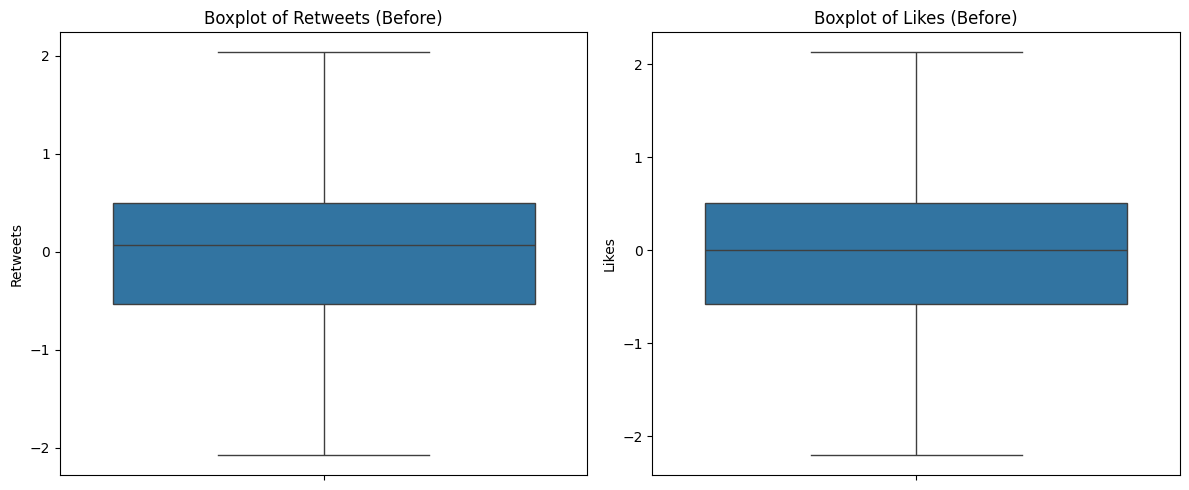

In [47]:
# Visualize before capping
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()

In [44]:
# Define the capping function (this is correct)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to each numerical column
for col in numerical_cols:
    print(f"Capping outliers in {col}...")
    df = cap_outliers(df, col)   # ← Use 'col' here (the loop variable)



Step 3: Outlier Detection (Retweets & Likes)...


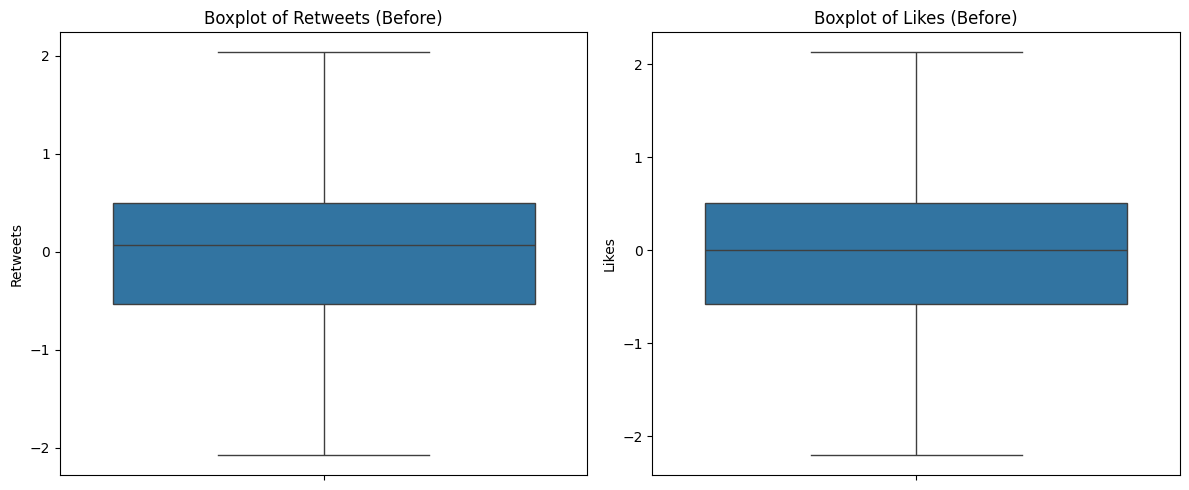

Capping outliers in Retweets...
Capping outliers in Likes...


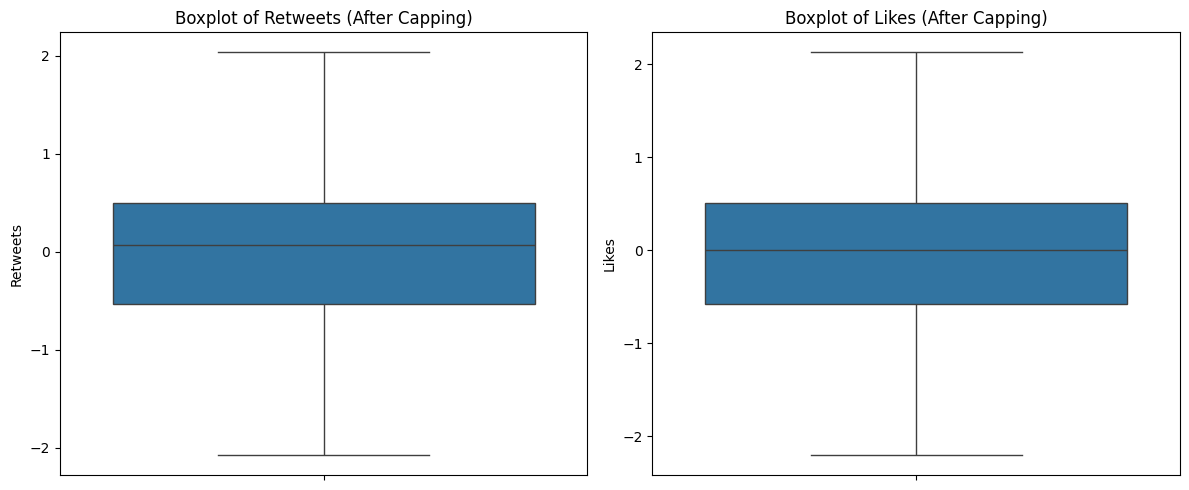

In [48]:
# 3. Detect and Handle Outliers
# ========================
print("\nStep 3: Outlier Detection (Retweets & Likes)...")

numerical_cols = ['Retweets', 'Likes']

# Visualize before capping
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()

# Define the capping function (this is correct)
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply capping to each numerical column
for col in numerical_cols:
    print(f"Capping outliers in {col}...")
    df = cap_outliers(df, col)   # ← Use 'col' here (the loop variable)

# Visualize after capping
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

In [50]:
# 5. Normalize / Standardize Numerical Features
# ========================
print("\nStep 5: Scaling Numerical Features...")

# Select numerical columns to scale
num_cols_to_scale = ['Retweets', 'Likes']

# Option 1: StandardScaler (mean=0, std=1) - good for most ML models
scaler = StandardScaler()
df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

# Option 2: MinMaxScaler (0 to 1) - if you prefer bounded range
# scaler = MinMaxScaler()
# df[num_cols_to_scale] = scaler.fit_transform(df[num_cols_to_scale])

print("\nScaled Features Preview:")
print(df[num_cols_to_scale].describe().round(2))


Step 5: Scaling Numerical Features...

Scaled Features Preview:
       Retweets   Likes
count    732.00  732.00
mean      -0.00    0.00
std        1.00    1.00
min       -2.13   -2.26
25%       -0.54   -0.58
50%        0.08    0.02
75%        0.52    0.53
max        2.12    2.20


In [62]:
# 6. Final Cleaned Dataset
# ========================
print("\nStep 6: Final Cleaned Dataset Ready for Analysis/Modeling")
print("Final Shape:", df.shape)
print("\nFinal Columns:")
print(df.columns.tolist())

# Save cleaned dataset
df.to_csv("sentiment_dataset_cleaned.csv", index=False)
print("\nCleaned dataset saved as: sentiment_dataset_cleaned.csv")

# Optional: Show last 5 rows of cleaned data
print("\nLast 5 rows of cleaned data:")
print(df.tail())


Step 6: Final Cleaned Dataset Ready for Analysis/Modeling
Final Shape: (732, 130)

Final Columns:
['Unnamed: 0.1', 'Text', 'Sentiment', 'Timestamp', 'User', 'Hashtags', 'Retweets', 'Likes', 'Year', 'Month', 'Day', 'Hour', 'Sentiment_encoded', 'Platform_ Instagram ', 'Platform_ Twitter ', 'Platform_ Twitter  ', 'Country_ Australia  ', 'Country_ Australia   ', 'Country_ Australia    ', 'Country_ Australia     ', 'Country_ Australia      ', 'Country_ Australia        ', 'Country_ Australia         ', 'Country_ Australia          ', 'Country_ Austria         ', 'Country_ Belgium         ', 'Country_ Brazil ', 'Country_ Brazil     ', 'Country_ Brazil          ', 'Country_ Brazil           ', 'Country_ Brazil            ', 'Country_ Cambodia ', 'Country_ Canada', 'Country_ Canada ', 'Country_ Canada  ', 'Country_ Canada   ', 'Country_ Canada    ', 'Country_ Canada     ', 'Country_ Canada      ', 'Country_ Canada       ', 'Country_ Canada        ', 'Country_ Canada         ', 'Country_ Canad